In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 17.8 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.132.39.248


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.132.39.248:8501

npx: installed 22 in 2.665s
your url is: https://warm-suns-run.loca.lt
  Stopping...
^C


2023-11-08 05:27:57.385 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


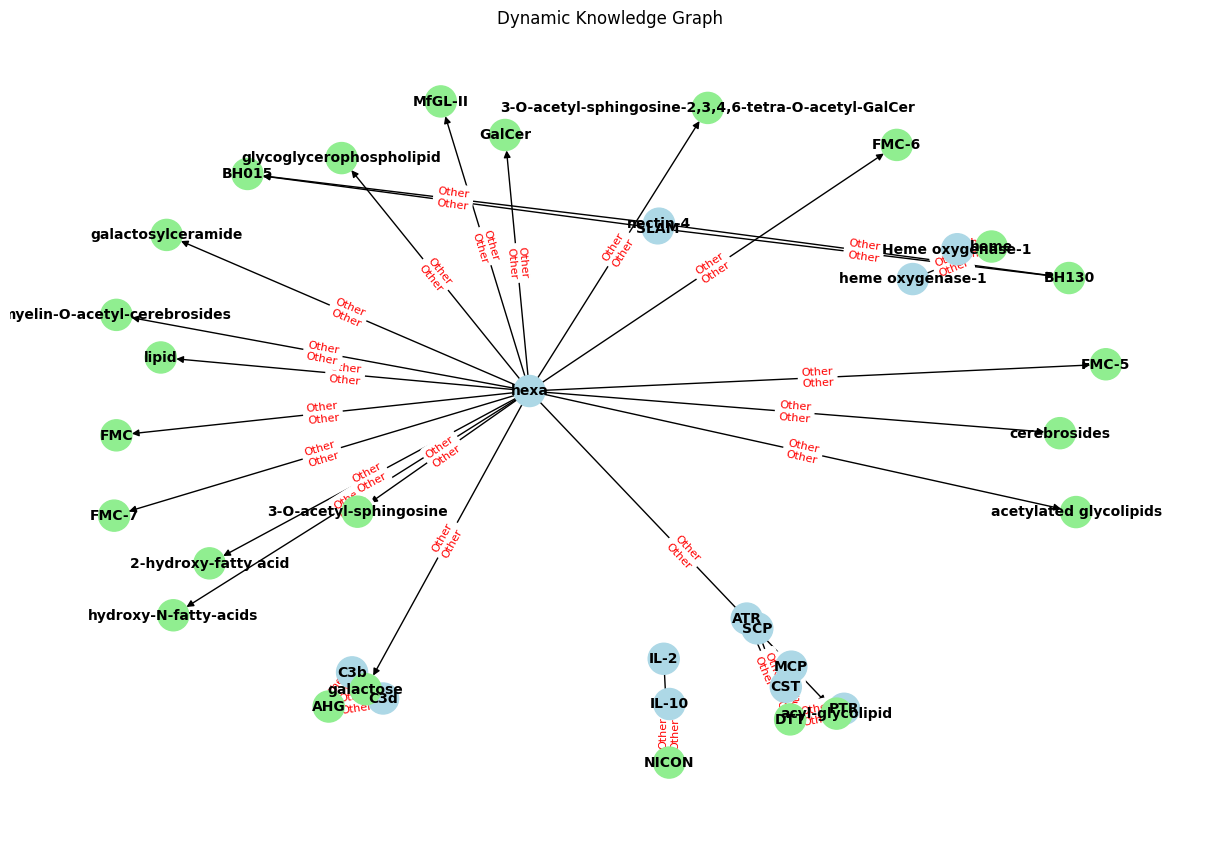

In [ ]:
import streamlit as st
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os

# Define a function to load the CSV file based on user selection
def load_data(selected_file):
    df = pd.read_csv(selected_file)
    return df

# Get a list of CSV files in the directory
csv_files = [f for f in os.listdir() if f.endswith(".csv")]

# Initialize Streamlit app
st.title("Dynamic Knowledge Graph")

# Create a file selection dropdown
selected_file = st.selectbox("Select a CSV file", csv_files)

if selected_file:
    df = load_data(selected_file)

    # Create a directed graph
    G = nx.DiGraph()

    # Create nodes for Genes and Chemicals
    for gene in df['Genes'].unique():
        G.add_node(gene, node_type="Gene")

    for chemical in df['Chemicals'].unique():
        G.add_node(chemical, node_type="Chemical")

    # Add edges based on the DataFrame
    for _, row in df.iterrows():
        genes = row['Genes']
        chemicals = row['Chemicals']
        interaction_type = row['Interaction type']
        regulation = row['Regulation']

        G.add_edge(genes, chemicals, interaction_type=interaction_type, regulation=regulation)

    # Set node positions using a layout algorithm
    pos = nx.spring_layout(G, seed=42)

    # Create a checkbox for showing or hiding node labels
    show_labels = st.checkbox("Show Node Labels", value=True)

    # Create a checkbox for displaying the full graph
    display_full_graph = st.checkbox("Display Full Graph", value=True)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    node_colors = ['lightblue' if G.nodes[node]['node_type'] == "Gene" else 'lightgreen' for node in G.nodes()]
    edge_labels = {(u, v): f"{data['interaction_type']}\n{data['regulation']}" for u, v, data in G.edges(data=True)}

    if display_full_graph:
        # Draw the entire graph
        nx.draw(G, pos, with_labels=show_labels, node_size=500, node_color=node_colors, font_size=10, font_color='black', font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=8, font_color='red')
    else:
        selected_node = st.selectbox("Select a node", list(G.nodes()))
        if selected_node:
            st.write(f"Selected Node: {selected_node}")
            edges_with_node = [edge for edge in G.edges(data=True) if selected_node in edge[:2]]

            # Create a subgraph based on the selected node and its edges
            subgraph = G.subgraph([selected_node] + [edge[0] for edge in edges_with_node] + [edge[1] for edge in edges_with_node])
            pos_subgraph = nx.spring_layout(subgraph, seed=42)

            # Draw the subgraph
            node_colors_subgraph = ['lightblue' if subgraph.nodes[node]['node_type'] == "Gene" else 'lightgreen' for node in subgraph.nodes()]
            edge_labels_subgraph = {(u, v): f"{data['interaction_type']}\n{data['regulation']}" for u, v, data in subgraph.edges(data=True)}
            nx.draw(subgraph, pos_subgraph, with_labels=show_labels, node_size=500, node_color=node_colors_subgraph, font_size=10, font_color='black', font_weight='bold')
            nx.draw_networkx_edge_labels(subgraph, pos_subgraph, edge_labels=edge_labels_subgraph, label_pos=0.5, font_size=8, font_color='red')

    plt.title("Dynamic Knowledge Graph")
    plt.axis('off')
    st.pyplot(plt)
